In [ ]:
# prompt: BeautifulSoup find only elements where an attribute contains a sub-string

from bs4 import BeautifulSoup

# Sample HTML content
html_content = """
<div class="item-container">
  <a href="/product1" data-product-id="123">Product 1</a>
  <a href="/product2" data-product-id="456-xyz">Product 2</a>
  <a href="/product3" data-product-id="789">Product 3</a>
  <span data-product-id="abc-def">Some Text</span>
</div>
"""

soup = BeautifulSoup(html_content, 'html.parser')


# Find all elements where the 'data-product-id' attribute contains the substring "xyz"
elements = soup.find_next('a', attrs={"href": lambda value: value and "xyz" in value})


# Print the elements
for element in elements:
element


10

In [2]:
import requests
import math
import random
import time
from bs4 import BeautifulSoup

In [4]:
def URL(offset):
  assert(offset >= 0)
  return f"https://www.cross-tables.com/annolistself.php?offset={offset}"

def GAME_URL(num):
  assert(num >= 0)
  return f"https://www.cross-tables.com/annotated/selfgcg/{math.floor(num/100)}/anno{num}.gcg"

In [115]:
headers = {
  'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.12; rv:55.0) Gecko/20100101 Firefox/55.0',
}

game_link_url = 'annotated.php?u='

def get_first_game_num(offset):
  """
  Returns the first game number on the page of annotated games.

  Args:
    offset: The offset number used in the URL.

  Returns:
    The list of game numbers on the page.
  """
  assert(offset >= 0)

  # Get the page of annotated games
  response = requests.get(URL(offset=offset), headers=headers)
  soup = BeautifulSoup(response.content, 'html.parser')

  link = soup.find('a', attrs={'href': lambda value: game_link_url in value})
  link = link.get('href')
  return(int(link[len(game_link_url):]))

def get_game_data(game_num, debug=False):
  """
  Returns the game data for the given game number.

  Args:
    game_num: The game number.

  Returns:
    A tuple (winner, score_difference). winner is a player index,
    is none if no winner. The index for the player who made the first
    move is 0, the second player is 1. score_difference is the difference
    in scores between the winnder and loser.
  """
  assert(game_num >= 0)

  response = requests.get(GAME_URL(game_num), headers=headers)
  content = response.content.decode('utf-8')

  player_1 = ">" + content.split('#player1')[1].split()[0]
  player_2 = ">" + content.split('#player2')[1].split()[0]

  score_1 = content.split(player_1)[-1].splitlines()[0].split()[-1]
  score_2 = content.split(player_2)[-1].splitlines()[0].split()[-1]

  if debug:
    print(f"player_1: {player_1}, player_2: {player_2}")
    print(f"score_1: {score_1}, score_2: {score_2}")

  winner = None
  score_difference = 0
  if score_1 > score_2:
    winner = 0
    score_difference = int(score_1) - int(score_2)
  elif score_1 < score_2:
    winner = 1
    score_difference = int(score_2) - int(score_1)

  return (winner, score_difference)

In [117]:
total_offsets = 43520
sample_size = 1000
num_games = 0
total_wins = 0 # total number of wins for player 0
total_draws = 0

# Get random game data
offsets = random.sample(range(total_offsets+1), sample_size)

for offset in offsets:
  try:
    game_num = get_first_game_num(offset)
    game_data = get_game_data(game_num)
  except Exception as e:
    print(f"Offset Error: {offset}")
    print(e)
    continue

  if (game_data[1] == None):
    total_draws += 1
  elif (game_data[0] == 0):
    total_wins += 1
  num_games += 1

print(f"total wins for player 0: {total_wins}")
print(f"total draws: {total_draws}")
print(f"total games: {num_games}")

Offset Error: 11997
invalid literal for int() with base 10: 'Berofsky'
Offset Error: 24153
list index out of range
total wins for player 0: 548
total draws: 0
total games: 998


In [31]:
# TESTING
game_num = get_first_game_num(40469)
game_data = get_game_data(game_num, debug=True)
print(game_data)


player_1: >Makbuk, player_2: >Ronald
score_1: Makbul, score_2: 393
#player1 Makbuk Makbul
:  (RST) +6 393


ValueError: invalid literal for int() with base 10: 'Makbul'

In [78]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statistics
import math

In [58]:
def get_confidence_interval(sample_size, p):
  return [p-1.96*math.sqrt(p*(1-p)/sample_size), p+1.96*math.sqrt(p*(1-p)/sample_size)]

def plot_confidence_interval(x, estimate, ci, horizontal_line_width=0.03):
    left = x - horizontal_line_width / 2
    top = ci[1]
    right = x + horizontal_line_width / 2
    bottom = ci[0]
    plt.plot([x, x], [top, bottom], color='black')
    plt.plot([left, right], [top, top], color='black')
    plt.plot([left, right], [bottom, bottom], color='black')
    plt.plot(x, estimate, 'o', color='black')

In [118]:
# From web scraping above
sample_size = 998
wins_player_1 = 548
wins_player_2 = 998 - 548
p1 = wins_player_1 / sample_size
p2 = wins_player_2 / sample_size

player 1 win percent: 0.5490981963927856, ci [0.5182267629388541, 0.5799696298467171]
player 2 win percent: 0.45090180360721444, ci [0.4200303701532829, 0.481773237061146]


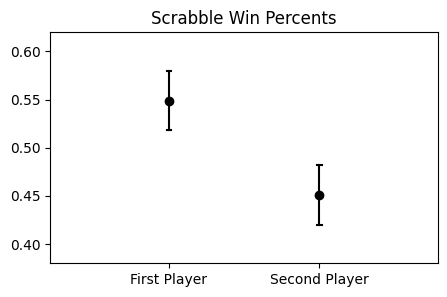

In [121]:
plt.xticks([1, 2], ['First Player', 'Second Player'])
plt.title('Scrabble Win Percents')
ci1 = get_confidence_interval(sample_size, p1)
ci2 = get_confidence_interval(sample_size, p2)

plot_confidence_interval(1, p1, ci1)
plot_confidence_interval(2, p2, ci2)

print(f'player 1 win percent: {p1}, ci {ci1}')
print(f'player 2 win percent: {p2}, ci {ci2}')

plt.margins(x=0.75, y=0.25)
plt.gcf().set_size_inches(5, 3)
plt.show()

In [120]:
result = sm.stats.mcnemar(
  [
    [0, wins_player_1],
    [wins_player_2, 0]
  ]
  , exact=False
)
print(result)

pvalue      0.0021371403402996314
statistic   9.427855711422845
